<img src="dataset-cover.jpg" alt="Drawing" style="width: 80px;"/>

## ML For Business - GMBA 16 - Final Project
### Group Members: Amir Melnikov, Leeat Elkayam, Hanan Czerny
#### Based on Consumer Behavior and Shopping Habits Dataset
Which may or may not be an AI generated dataset...

https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## **Basic data exploration**

#### Read the data

In [2]:
df = pd.read_csv("shopping_behavior_updated.csv") 

#### Examine your data using different methods

Use the head, info function to get a sense of your data.

In [3]:
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
176,177,53,Male,Backpack,Accessories,81,New Hampshire,L,Black,Spring,2.7,Yes,Next Day Air,Yes,Yes,30,Credit Card,Quarterly
3884,3885,47,Female,Sandals,Footwear,29,Maryland,M,Brown,Fall,4.9,No,Express,No,No,3,PayPal,Weekly
3850,3851,27,Female,Jewelry,Accessories,74,Mississippi,L,Indigo,Summer,4.4,No,2-Day Shipping,No,No,25,Debit Card,Every 3 Months
699,700,50,Male,Handbag,Accessories,46,Connecticut,M,Charcoal,Fall,2.6,Yes,2-Day Shipping,Yes,Yes,5,PayPal,Weekly
640,641,53,Male,Skirt,Clothing,88,Minnesota,M,Gray,Summer,4.4,Yes,Store Pickup,Yes,Yes,28,Debit Card,Fortnightly


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

***There are 18 features: 5 numeric and 13 objects.***

*Some of the objects are in fact boolean, and customer ID is not a numeric feature.

In [5]:
df.describe()
#The describe function is applied to numeric features only: 

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


**For categrical variables use value_counts method:**

In [6]:
df["Season"].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [7]:
df["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

#### Identify missing data
To identify missing values you can look on the describe function results, or to use the direct functions isna and isnull, with sum.

In [8]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## **Handle categorical feature**


#### Categorical variables need to be transformed to an integer, as sklearn works with numeric data only. 
#### Some are already encoded as numbers, but two are still objects.

##### Map Ordinal features
We can define a dictionary that maps each ordinal value to a numerical value, and then use the function "map" as shown below, or use the function "replace" as shown in: http://pbpython.com/categorical-encoding.html .

In [9]:
df_prep = df.copy() # we are starting to make changes to the original data, so we'll do it on a copy of the data

In [10]:
# size_map = {'S':0, 'M':1, 'L':2, 'XL':3}  #Define the mapping as a dictionary
# df_prep["Size"] =  df_prep["Size"].map(size_map)

# convert categorical columns to numerical data
for col in df_prep.select_dtypes(include='object'):
    df_prep[col] = pd.Categorical(df[col]).codes
    
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   int8   
 3   Item Purchased          3900 non-null   int8   
 4   Category                3900 non-null   int8   
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   int8   
 7   Size                    3900 non-null   int8   
 8   Color                   3900 non-null   int8   
 9   Season                  3900 non-null   int8   
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   int8   
 12  Shipping Type           3900 non-null   int8   
 13  Discount Applied        3900 non-null   int8   
 14  Promo Code Used         3900 non-null   

In [11]:
df_prep.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,3,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,4,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,5,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0
5,6,46,1,20,2,20,49,1,23,2,2.9,1,4,1,1,14,5,6
6,7,63,1,16,1,85,25,1,7,0,3.2,1,2,1,1,49,1,5
7,8,27,1,18,1,34,17,0,4,3,3.2,1,2,1,1,19,2,6
8,9,26,1,4,3,97,47,0,19,2,2.6,1,1,1,1,8,5,0
9,10,57,1,7,0,31,24,1,16,1,4.8,1,0,1,1,4,1,5


***Now, all the features are numeric.***

# Linear Regression
## Define Target Value
#### For prediction our target value will be the **"Promo Code Used"** value, in order to predict if the customer will use a Promo Code.
#### We will also drop some other variables that the model should have no access to prior to the purchase: Discount Applied and User ID

In [13]:
X = df_prep.drop(["Promo Code Used", "Discount Applied", "Customer ID"], axis=1)
y = df_prep["Promo Code Used"]
y.describe()

count    3900.000000
mean        0.430000
std         0.495139
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Promo Code Used, dtype: float64

In [14]:
X.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Previous Purchases,Payment Method,Frequency of Purchases
0,55,1,2,1,53,16,0,7,3,3.1,1,1,14,5,3
1,19,1,23,1,64,18,0,12,3,3.1,1,1,2,1,3
2,50,1,11,1,73,20,2,12,1,3.1,1,2,23,2,6
3,21,1,14,2,90,38,1,12,1,3.5,1,3,49,4,6
4,45,1,2,1,49,36,1,21,1,2.7,1,2,31,4,0


## **Split the data to train and test**

The more in-depth EDA and data preparations are done only on train data. Test data is set aside, so testing will be objective. Typically 20%-30% of the rows go randomly to test data. 

**We also need to verify we know what Y we are looking for - in our case the "left" value.**

In [15]:
#Before the split
X.describe()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,0.680000,12.035385,1.001795,59.764359,24.266410,1.120000,12.109487,1.492821,3.749949,0.270000,2.514359,25.351538,2.512308,2.974872
std,15.207589,0.466536,7.199162,0.896688,23.685392,14.343299,0.930496,7.221592,1.117236,0.716223,0.444016,1.697591,14.447125,1.690643,1.998559
min,18.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,31.000000,0.000000,6.000000,0.000000,39.000000,12.000000,0.000000,6.000000,0.750000,3.100000,0.000000,1.000000,13.000000,1.000000,1.000000
50%,44.000000,1.000000,12.000000,1.000000,60.000000,24.000000,1.000000,12.000000,1.000000,3.700000,0.000000,3.000000,25.000000,2.000000,3.000000
75%,57.000000,1.000000,18.000000,1.000000,81.000000,36.000000,2.000000,18.000000,2.000000,4.400000,1.000000,4.000000,38.000000,4.000000,5.000000
max,70.000000,1.000000,24.000000,3.000000,100.000000,49.000000,3.000000,24.000000,3.000000,5.000000,1.000000,5.000000,50.000000,5.000000,6.000000


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# After the split
X_train.describe()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Previous Purchases,Payment Method,Frequency of Purchases
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,44.042949,0.673077,12.065064,1.002564,60.142949,24.383974,1.118910,12.114744,1.512500,3.750673,0.266346,2.519872,25.402564,2.507692,2.955449
std,15.210379,0.469164,7.170524,0.897430,23.677730,14.218061,0.926764,7.215657,1.117283,0.710562,0.442118,1.700835,14.520953,1.695270,1.991068
min,18.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,31.000000,0.000000,6.000000,0.000000,39.000000,12.000000,0.000000,6.000000,1.000000,3.100000,0.000000,1.000000,13.000000,1.000000,1.000000
50%,44.000000,1.000000,12.000000,1.000000,60.000000,24.000000,1.000000,12.000000,2.000000,3.800000,0.000000,3.000000,25.000000,3.000000,3.000000
75%,57.000000,1.000000,18.000000,1.000000,81.000000,36.000000,2.000000,18.250000,3.000000,4.400000,1.000000,4.000000,38.000000,4.000000,5.000000
max,70.000000,1.000000,24.000000,3.000000,100.000000,49.000000,3.000000,24.000000,3.000000,5.000000,1.000000,5.000000,50.000000,5.000000,6.000000


## Creating a Regression Model

In [18]:
lr = LinearRegression()
rf = RandomForestRegressor()

# Train models on training data
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor()

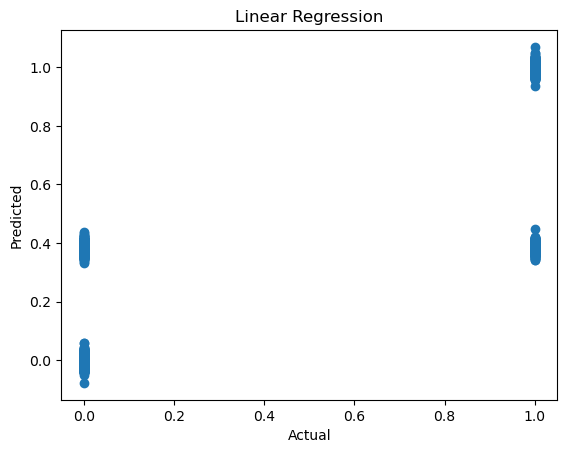

In [19]:
plt.scatter(y_test, lr.predict(X_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()


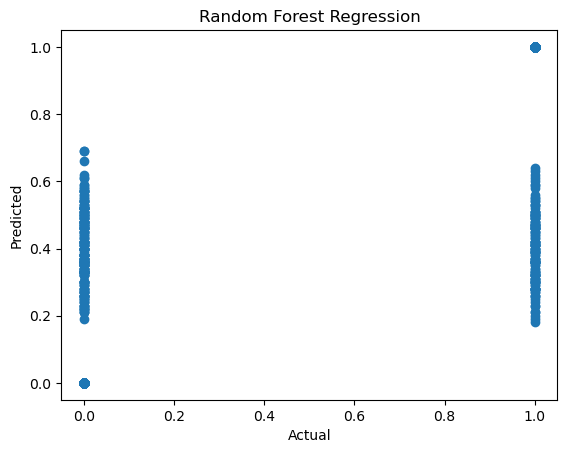

In [20]:
plt.scatter(y_test, rf.predict(X_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

lr_train_mse = mean_squared_error(y_train, lr.predict(X_train))
lr_test_mse = mean_squared_error(y_test, lr.predict(X_test))

rf_train_mse = mean_squared_error(y_train, rf.predict(X_train))
rf_test_mse = mean_squared_error(y_test, rf.predict(X_test))

print('Linear Regression Train MSE:', lr_train_mse)
print('Linear Regression Test MSE:', lr_test_mse)

print('Random Forest Regression Train MSE:', rf_train_mse)
print('Random Forest Regression Test MSE:', rf_test_mse)

Linear Regression Train MSE: 0.09583499028355875
Linear Regression Test MSE: 0.10382864970724487
Random Forest Regression Train MSE: 0.013564807692307694
Random Forest Regression Test MSE: 0.10835089743589743


### We left it Here to show the regression models are useless in this case. 

## Creating a Classifier
#### ***We will use a simple decision tree for now***

### Train

In [22]:
tree = DecisionTreeClassifier(max_depth=15)

In [23]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15)

### Evaluation

In [24]:
y_test_predict = tree.predict(X_test)

In [25]:
cm = confusion_matrix(y_test, y_test_predict)

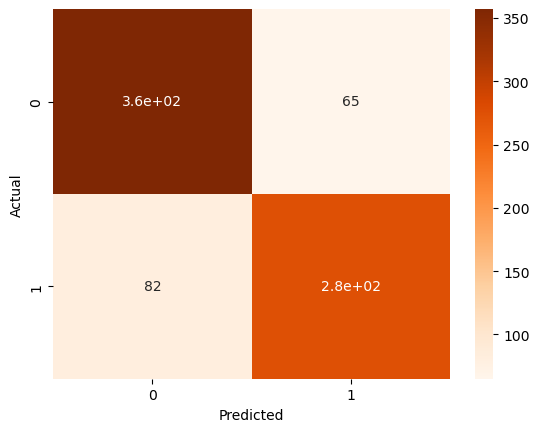

In [26]:
sns.heatmap(cm, annot=True, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
print("The precision for Tree is ",precision_score(y_test, y_test_predict)) 
print("The recall for Tree is ",recall_score(y_test, y_test_predict),"\n")

The precision for Tree is  0.8093841642228738
The recall for Tree is  0.770949720670391 



## Feature Importance

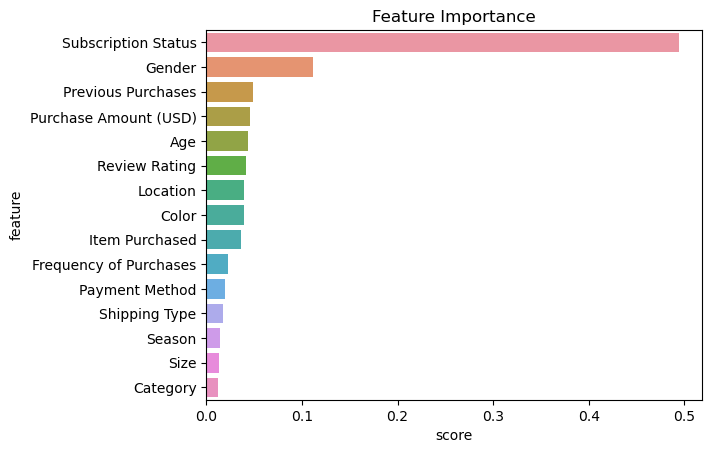

In [28]:
rf_feature_score = rf.feature_importances_
feature_names = list(X)
df_rf_feature_score = pd.DataFrame(data=feature_names, columns=["feature"])
df_rf_feature_score["score"]= rf_feature_score
df_rf_feature_score = df_rf_feature_score.sort_values(by=['score'], ascending=False)
ax = sns.barplot(y="feature", x="score", data=df_rf_feature_score)
ax.set_title('Feature Importance')
plt.show()